# Hidden Markov models


> "Brief introduction to hidden Markov models"

- toc:true
- branch: master
- badges: false
- comments: false
- author: Alexandros Giavaras
- categories: [hidden-markov-model, machine-learning,algorithms, numerics]


## Introduction to hidden Markov models

We know that given a sample of independent observations we can get the likelihood of the sample by forming the product of  the likelihoods of the individual instances. However, there are situations in which the assumption of observation independence simply breaks down. An example of such a situation is when we consider words from the English dictionary. In this case, within a word, successive letters are dependent; in
English ```h``` is very likely to follow ```t``` but not ```x```. In such a scenario, it is better to assume that the sequence is generated by a parametric random process. Our goal is to establish the parameters of this process. Hidden Markov models are a way to model such a process. Let's see how. 

A <a href="https://en.wikipedia.org/wiki/Hidden_Markov_model">hidden Markov model</a> or HMM, is a statistical model in which the system being modeled is assumed to be a Markov process. Let's call that process with $X$. The system can be on a series of states from a give state set. However, we don't know at each time instant the specific state the system is in. In other words, the system state is unobservable. HMM assumes that there is another process, say  $Y$,  whose behavior depends on $X$. The goal is to learn about $X$ by observing $Y$. 

Let's assume that at any time the system or random process we model can be in any of $N$ distinct states. Let's denote this set with $\mathbb{S}$

$$\mathbb{S} = \{S_1, S_2,\cdots,S_N\}$$

Furthermore, let's denote the state that the system is at time $t$ by $q_t$.

The system can move from one state to another. The probability of being at state $S_j$ at time $t$ depends on the values of the previous states. We express this mathematically using the following conditional probability: 

$$P(q_t=S_j | q_{t-1}=S_i, q_{t-2}=S_k, \cdots)$$

A hidden Markov model assume that system states form a <a href="https://encyclopediaofmath.org/wiki/Markov_property">Markov chain</a>. To be more specific we will restrict ourselves to the first-order Markov model which is quite frequent in practice. In this case, the probability above simply becomes: 

$$P(q_t=S_j | q_{t-1}=S_i, q_{t-2}=S_k, \cdots)=P(q_t=S_j | q_{t-1}=S_i)$$

In words, what the first order Markov property tells us is that the state of the system depends solely on the previous state; a rather memoryless situation.

Let's move further by introducing the so-called transition probabilities $\alpha_{i,j}$:

$$\alpha_{i,j}=P(q_t=S_j | q_{t-1}=S_i)$$

Since the $\alpha_{i,j}$'s are probabilities they should satisfy the followin constraints 

$$\alpha_{i,j} \geq 0, ~~~\sum_{j=1}^{N} \alpha_{i,j} = 1$$

These are nothing more than the usual axioms of the definition of probability. Note that for the latter condition we keep the $i$ index fixed. 

We will assume that the transition probabilities are independent of time. What this means is that going from $S_i$ to $S_j$ has the same probability regardless of when it happens (i.e. in the observation sequence see below).  

We usually arrange the transition probabilities into an $N\times N$ matrix, denoted here with $\mathbf{A}$ that its rows sum to one.

We now have a way, or a model, that allows us to move from one state to another. However, we cannot do much with it as the states are unknown, hidden, unobserved or any other expression that suits your needs. The point is that we cannot access them. In order to have progress, hidden Markov models assume a second process that produces observation sequences. We can use this process to infer the state of the system. 

Let's denote by $\lambda$ ( we will be more specific about what $\lambda$ denotes further below) the HMM instance we are using. Let $O_T$ be an observation sequence of length $T$. We assume that $O_T$ has elements from a given discrete set $\mathbb{V}$:

$$\mathbb{V}=\{v_1, v_2,\cdots, v_M \}$$

The set $\mathbb{V}$ has in total $M$ elements. Also let's introduce the mechanism that characterizes the generation of a sequence given a state $S_j$. This is done via the so-called emission probability matrix $b_j(m)$:

$$b_j(m) = P(O_t = v_m|q_t = S_j)$$

this is the probability that we observe element $v_m$ at time $t$ when the system is at state $S_j$. For example, let's assume that that we have two states and three symbols and we are given the following emission probabilities matrix

$$\mathbf{B}=\begin{bmatrix} 0.16 & 0.26 & 0.58 \\ 0.25 & 0.28 & 0.47\end{bmatrix}$$

what this tells us is that at state $S_1$ symbol $v_1$ has probability 0.16 to be observed, symbol $v_2$ will be observed 26\% and symbol $v_3$ will be observed 58\%.

Although, we cannot observe the state sequence $Q$, this can be inferred from the observation sequence $O$. Note however that in general there are many different sequences $Q$ that can generate the same observation sequence. This is however done with different probabilities.  This is similar when we have an iid sample from, say, a normal distribution; there are an infinite number of $\mu, \sigma$ pairs possible which can generate the sameple. Thus, we are more interested in a maximum likelihood state sequence or a sequence that has the maximum probability of generating the sequence $O$.

### <a name="test_case_3"></a> What is $\lambda$?

Above we used the notation $\lambda$ in order to indicate a specific HMM instance. Let's see what this $\lambda$ parameter actually imply. This is also a summary of the basic element of an HMM. Specifically, 


- An HMM model assumes a set of states in the model $\mathbb{S} = \{S_1, S_2,\cdots,S_N\}$

- An HMM model assumes a number of distinct observation symbols $\mathbb{V}=\{v_1, v_2,\cdots, v_M \}$

- An HMM model assumes the existence of transition probabilities $\mathbf{A}$ where $\alpha_{i,j}=P(q_t=S_j | q_{t-1}=S_i)$

- An HMM model assumes the existence of observation probabilities $\mathbf{B}$ where $b_j(m) = P(O_t = v_m|q_t = S_j)$

The last thing we need to talk about, is how to initialize the model. This is done by a vector of initial probabilties $\boldsymbol{\pi}$ where each $\pi_i = P(q_1 = S_i)$ that is each $\pi_i$ is the probability that the first state of the model is $S_i$.

The $\lambda$ parameter is the triplett consisting of the matrices $\mathbf{A}$, $\mathbf{B}$ and the vector $\boldsymbol{\pi}$

$$\lambda = \{\mathbf{A}, \mathbf{B}, \boldsymbol{\pi} \}$$

For a state set with $N$ states, $\mathbf{A}$ is $N\times N$. Likewise for a set $V$ with $M$ symbols, $\mathbf{B}$ is $N \times M$. Finally the vector $\boldsymbol{\pi}$ has size $N$.

Typically, when dealing with an HMM we are intersted in the following three problems [1]

1. Given an HMM i.e. $\lambda$ evaluate the probability of a given observation sequence:

$$P(O| \lambda)$$

2. Given an HMM and an observation sequence $O$ we want to find the state sequence $Q$ with the highest probability of producing $O$ i.e we want to find $Q$ such that 

$$P(Q|O, \lambda) ~~ \text{is maximum}$$

3. Given a training set of observation sequences $\mathbf{X}$ we want to learn the HMM that maximizes the probability of generating $\mathbf{X}$ that is we want to find $\lambda$ so that 

$$P(\mathbf{X}|\lambda)~~ \text{is maximum}$$

Checkout the video below for a motivation about Hidden Markov models 

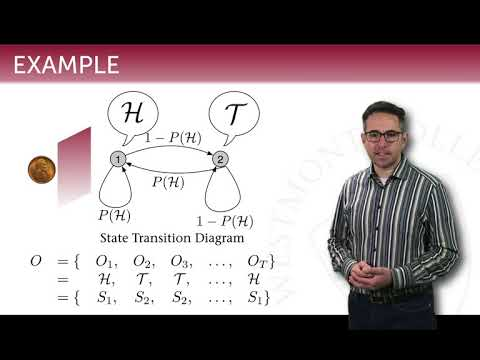

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('PAngl8DZ8yk', width=800, height=300)

The following video explains the Markov property

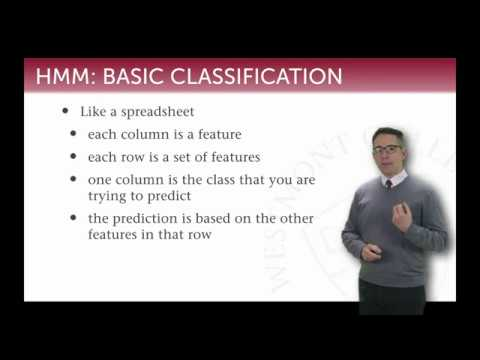

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('J_y5hx_ySCg', width=800, height=300)

## <a name="refs"></a> References


1. Ethem Alpaydin, ```Introduction To Machine Learning, Second Edition```, MIT Press.